# Data Insights Unveiled: Data Science Job Analysis!

## INTRODUCTION

<font size='4'>As a newcomer to the world of data analysis, I've intentionally shifted from a different career path. Armed with a series of relevant certificate courses, my goal is to excel in the fast-changing tech Industry, where data analysis plays a important role in informed decision-making.</font>

<font size='4'>To better comprehend the evolution of data-related job fields and understand the dynamics of this rapidly growing industry, I embarked on an exploratory journey. I set out to uncover insights into the field's growth, emerging trends, and the opportunities it offers. To achieve this, I delved into a dataset focused on data analysis jobs.</font>

## KEY OBJECTIVES

<font size='4'>• How has data related job growth been in the past few years? <br>
• Job growth by experience and job category? <br>
• Which job category has the highest number of positions? <br>
• How do job positions vary in relation to the size of the companies. <br>
• How does salary vary across different job positions and salary ranges? <br>
    <font size='4'>

## DATA SOURCE

<font size='4'>• The data source is a dataset sourced from Kaggle. <br>
• This small dataset contains three years of data.
    <font size='4'>

In [48]:
#importing related libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [49]:
#loading dataset using pandas

df = pd.read_csv(r'D:\Datasets\Data Science Jobs Analysis\ds.salaries.csv')

In [50]:
#cheching few row data

df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## DATA WRANGLING

In [51]:
#removing unnamed first colum

df.drop('Unnamed: 0', axis = 1, inplace=True)

In [52]:
#checking null values

df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [53]:
#investigating column data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [54]:
#droping duplicate values

df.duplicated().sum()
df.drop_duplicates(inplace=True)

### **Making column data more readable and understandable**

In [55]:
df.experience_level.value_counts()

SE    243
MI    208
EN     88
EX     26
Name: experience_level, dtype: int64

In [56]:
replace_exp = {'SE':'Senior', 'MI':'Mid-Level', 'EN':'Entry-Level', 'EX':'Experienced'}
df['experience_level'] = df['experience_level'].replace(replace_exp)

In [57]:
df.employment_type.value_counts()

FT    546
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

In [58]:
replace_empt = {'FT':'Full Time', 'PT':'Part Time', 'CT':'Contract', 'FL':'Freelance'}
df['employment_type'] = df['employment_type'].replace(replace_empt)

In [59]:
df.company_size.value_counts()

M    290
L    193
S     82
Name: company_size, dtype: int64

In [60]:
replace_size = {'M':'Medium', 'L':'Large', 'S':'Small'}
df['company_size'] = df['company_size'].replace(replace_size)

In [61]:
replace_coun = {'US': 'United States','GB': 'United Kingdom','CA': 'Canada','GR': 'Greece','ES': 'Spain','DE': 'Germany',
                'IN': 'India','AU': 'Australia','PT': 'Portugal','AE': 'United Arab Emirates','FR': 'France','MY': 'Malaysia',
                'CH': 'Switzerland','PK': 'Pakistan','IE': 'Ireland','AT': 'Austria','CZ': 'Czech Republic','EE': 'Estonia',
                'NL': 'Netherlands','PL': 'Poland','DZ': 'Algeria','MX': 'Mexico','LU': 'Luxembourg' }
df['company_location'] = df['company_location'].replace(replace_coun)

In [62]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-Level,Full Time,Data Scientist,70000,EUR,79833,DE,0,Germany,Large
1,2020,Senior,Full Time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,Small
2,2020,Senior,Full Time,Big Data Engineer,85000,GBP,109024,GB,50,United Kingdom,Medium
3,2020,Mid-Level,Full Time,Product Data Analyst,20000,USD,20000,HN,0,HN,Small
4,2020,Senior,Full Time,Machine Learning Engineer,150000,USD,150000,US,50,United States,Large


In [63]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [64]:
#statistic measurements

df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,565.000000,5.650000e+02,565.000000,565.000000
mean,2021.364602,3.381160e+05,110610.343363,69.911504
std,0.698138,1.599879e+06,72280.702792,40.900666
min,2020.000000,4.000000e+03,2859.000000,0.000000
25%,2021.000000,6.700000e+04,60757.000000,50.000000
50%,2021.000000,1.109250e+05,100000.000000,100.000000
75%,2022.000000,1.650000e+05,150000.000000,100.000000
max,2022.000000,3.040000e+07,600000.000000,100.000000


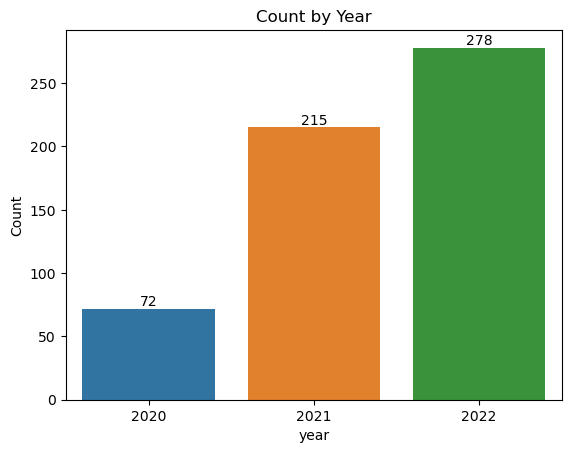

In [65]:
fig = sns.countplot(df, x = 'work_year')
for i in fig.containers:
    fig.bar_label(i)

fig.set_title('Count by Year')
fig.set_xlabel('year')
fig.set_ylabel('Count')

plt.show()

<font size="5">• From above chart we can clearly see the job growth over the past years</font>

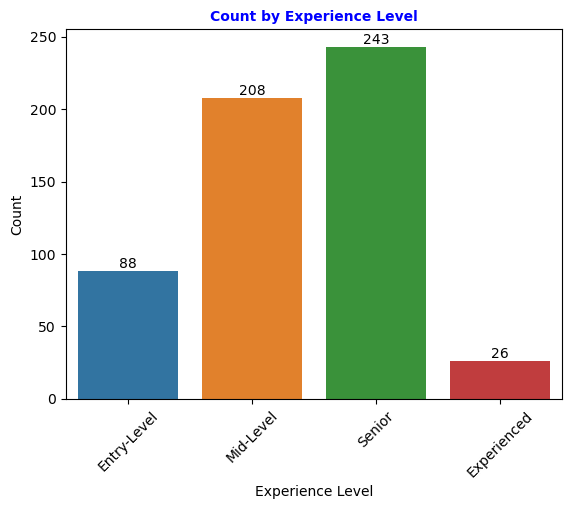

In [66]:
exp_order = ['Entry-Level', 'Mid-Level', 'Senior', 'Experienced']

fig = sns.countplot(data=df, x="experience_level", order=exp_order)
for i in fig.containers:
    fig.bar_label(i,)

fig.set_xticklabels(fig.get_xticklabels(), rotation=45)
fig.set_title('Count by Experience Level',fontdict={'size' : 10,'weight': 'bold', 'color': 'blue'})
fig.set_xlabel('Experience Level')
fig.set_ylabel('Count')

plt.show()

In [67]:
df1=df.query("work_year == 2020")
df2=df.query("work_year == 2021")
df3=df.query("work_year == 2022")

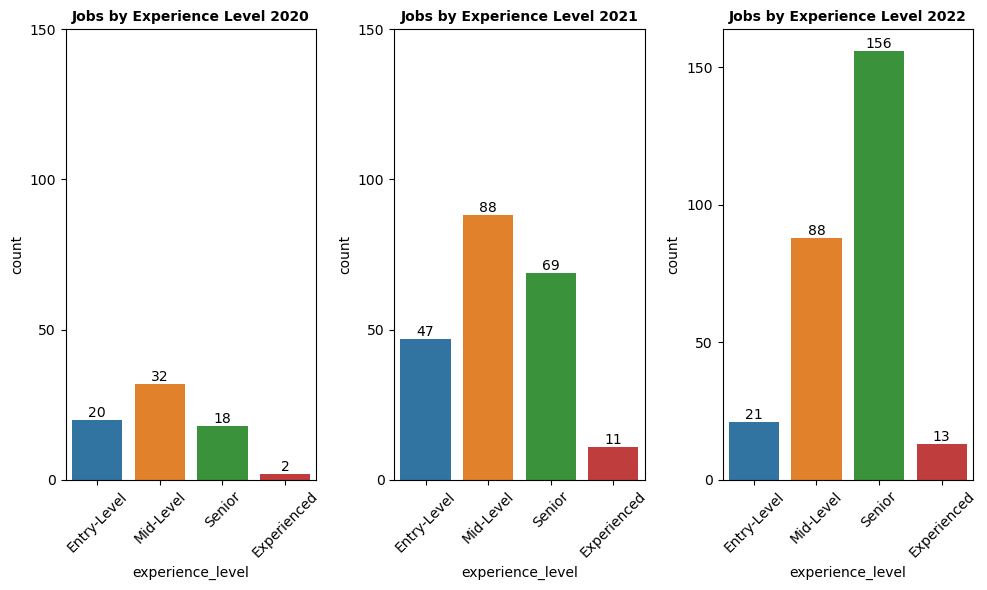

In [68]:
fig, axes = plt.subplots(1, 3, figsize=(10,6))

fig1 = sns.countplot(df1, x = 'experience_level', ax=axes[0], order = exp_order)
fig1.set_title('Jobs by Experience Level 2020', fontdict={'size' : 10, 'weight': 'bold', 'color': 'Black'})
fig1.set_yticks([0,50,100,150])
for i in fig1.containers:
    fig1.bar_label(i)

fig2 = sns.countplot(df2, x = 'experience_level', ax=axes[1], order = exp_order)
fig2.set_title('Jobs by Experience Level 2021', fontdict={'size' : 10, 'weight': 'bold', 'color': 'Black'})
fig2.set_yticks([0,50,100,150])
for i in fig2.containers:
    fig2.bar_label(i)

fig3 = sns.countplot(df3, x = 'experience_level', ax=axes[2], order = exp_order)
fig3.set_title('Jobs by Experience Level 2022', fontdict={'size' : 10, 'weight': 'bold', 'color': 'Black'})
fig3.set_yticks([0,50,100,150])
for i in fig3.containers:
    fig3.bar_label(i)

for i in axes:
    i.set_xticklabels(i.get_xticklabels(), rotation=45)

fig.tight_layout()
plt.show()

<font size = '5'>• The majority of job opportunities fall into two categories: Mid-level and Senior-level positions. <br>
• Senior level opportunities have rapid growth over past 3 years.
</font>

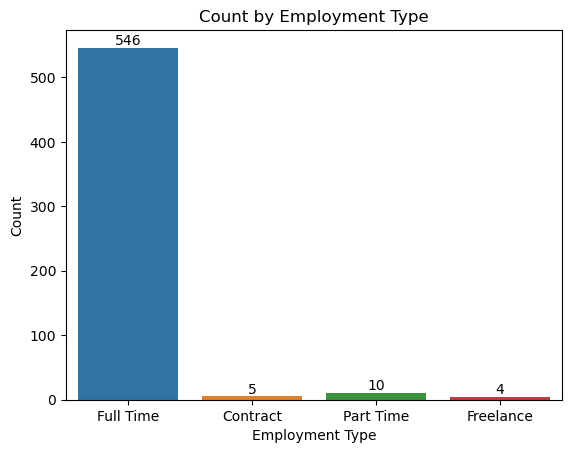

In [69]:
fig = sns.countplot(data=df, x = 'employment_type')
for i in fig.containers:
    fig.bar_label(i)

fig.set_title('Count by Employment Type')
fig.set_xlabel('Employment Type')
fig.set_ylabel('Count')

plt.show()

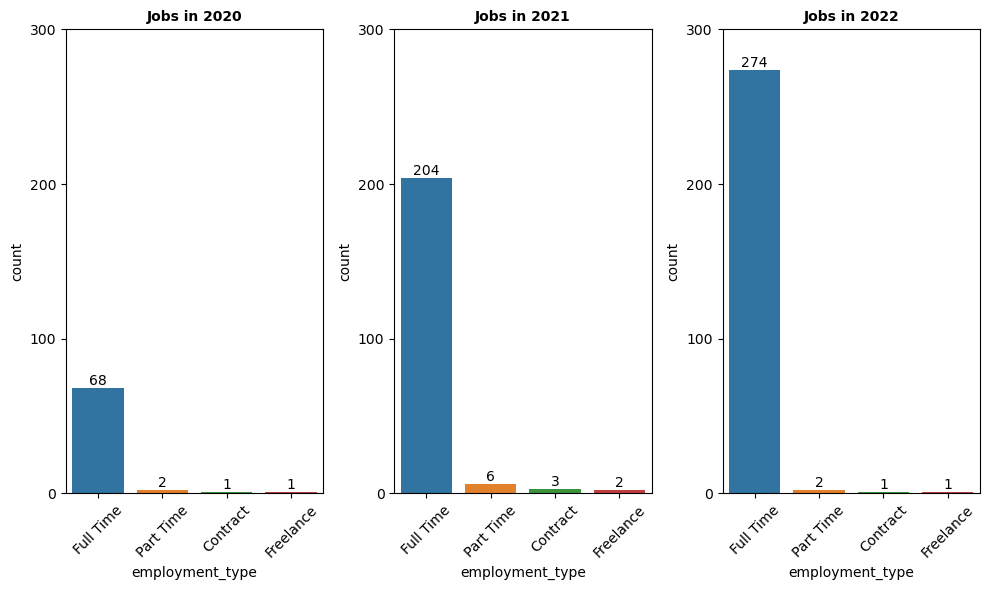

In [70]:
fig, axes = plt.subplots(1, 3, figsize=(10,6))

emp_order = ['Full Time', 'Part Time', 'Contract', 'Freelance']

fig1 = sns.countplot(df1, x = 'employment_type', ax=axes[0], order = emp_order)
fig1.set_title('Jobs in 2020', fontdict = {'size':10, 'weight':'bold', 'color':'Black'})
fig1.set_yticks([0,100,200,300])
for i in fig1.containers:
    fig1.bar_label(i)

fig2 = sns.countplot(df2, x = 'employment_type', ax=axes[1], order= emp_order)
fig2.set_title('Jobs in 2021', fontdict={'size':10, 'weight':'bold', 'color':'black'})
fig2.set_yticks([0,100,200,300])
for i in fig2.containers:
    fig2.bar_label(i)
    
fig3 = sns.countplot(df3, x = 'employment_type', ax=axes[2], order= emp_order)
fig3.set_title('Jobs in 2022', fontdict={'size':10, 'weight':'bold', 'color':'black'})
fig3.set_yticks([0,100,200,300])
for i in fig3.containers:
    fig3.bar_label(i)
    
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
    
fig.tight_layout()
plt.show()

<font size='5'>• Almost all the jobs are full time jobs</font>

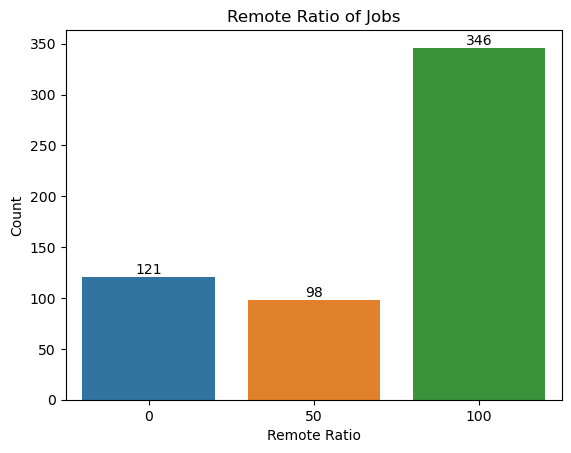

In [71]:
fig = sns.countplot(data = df, x='remote_ratio')
for i in fig.containers:
    fig.bar_label(i)

fig.set_title('Remote Ratio of Jobs')
fig.set_xlabel('Remote Ratio')
fig.set_ylabel('Count')

plt.show()

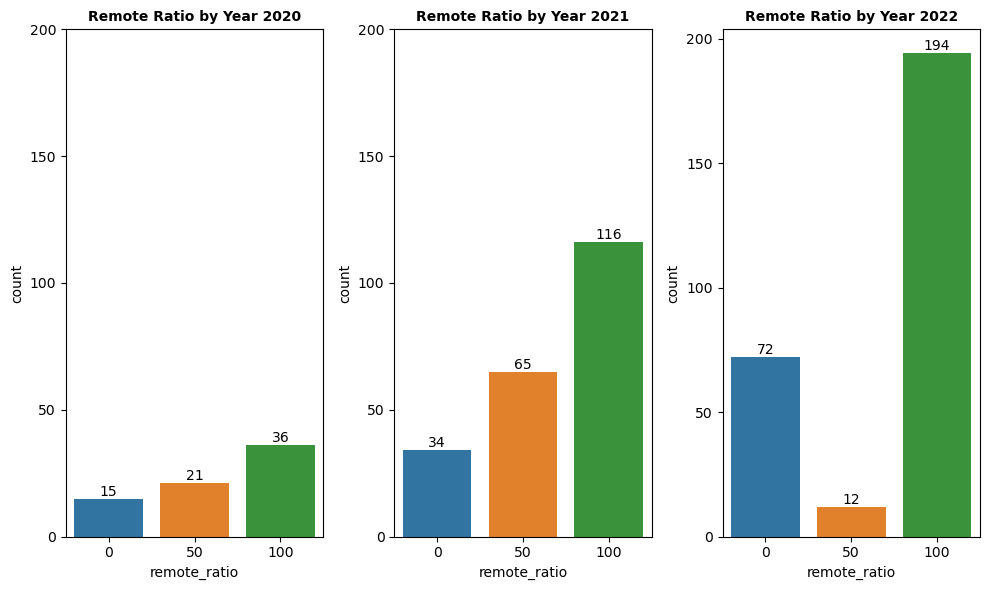

In [72]:
fig, axes = plt.subplots(1,3, figsize=(10,6))
rem_order = [0, 50, 100]

fig1 = sns.countplot(df1, x = 'remote_ratio', ax=axes[0], order=rem_order)
fig1.set_title('Remote Ratio by Year 2020', fontdict={'size':10, 'weight':'bold', 'color':'Black'})
fig1.set_yticks([0,50,100,150,200])
for i in fig1.containers:
    fig1.bar_label(i)

fig2 = sns.countplot(df2, x = 'remote_ratio', ax=axes[1], order=rem_order)
fig2.set_title('Remote Ratio by Year 2021', fontdict={'size':10, 'weight':'bold', 'color':'Black'})
fig2.set_yticks([0,50,100,150,200])
for i in fig2.containers:
    fig2.bar_label(i)

fig3 = sns.countplot(df3, x = 'remote_ratio', ax=axes[2], order=rem_order)
fig3.set_title('Remote Ratio by Year 2022', fontdict={'size':10, 'weight':'bold', 'color':'Black'})
fig3.set_yticks([0,50,100,150,200])
for i in fig3.containers:
    fig3.bar_label(i)
    
fig.tight_layout()
plt.show()

<font size='5'>• A significant portion of job roles are now fully remote, and this trend has seen steady growth over time.</font>

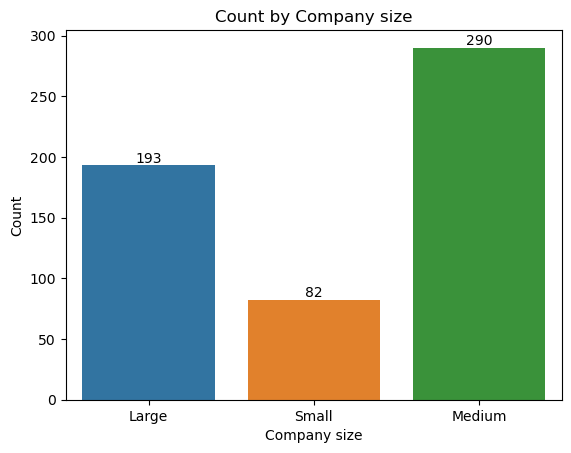

In [73]:
fig = sns.countplot(data = df, x='company_size')
for i in fig.containers:
    fig.bar_label(i)

fig.set_title('Count by Company size')
fig.set_xlabel('Company size')
fig.set_ylabel('Count')

plt.show()

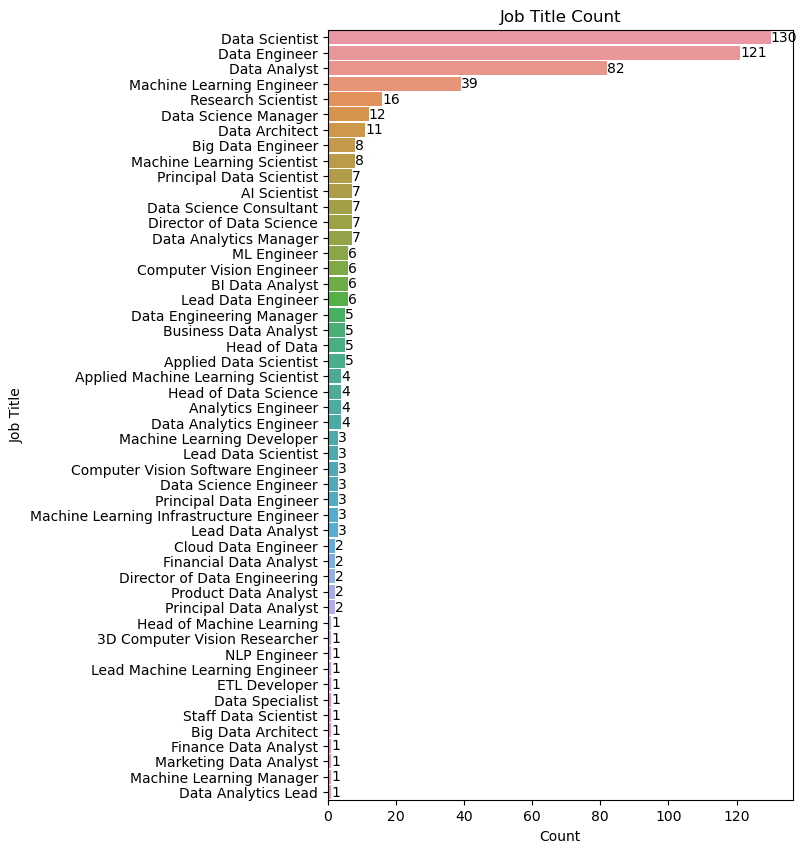

In [74]:
fig, axes = plt.subplots(figsize=(6,10))
fig = sns.countplot(df, y = 'job_title', orient='h', order=df['job_title'].value_counts().index, width = 0.9)
for i in fig.containers:
    fig.bar_label(i)

fig.set_title('Job Title Count')
fig.set_xlabel('Count')
fig.set_ylabel('Job Title')
plt.show()

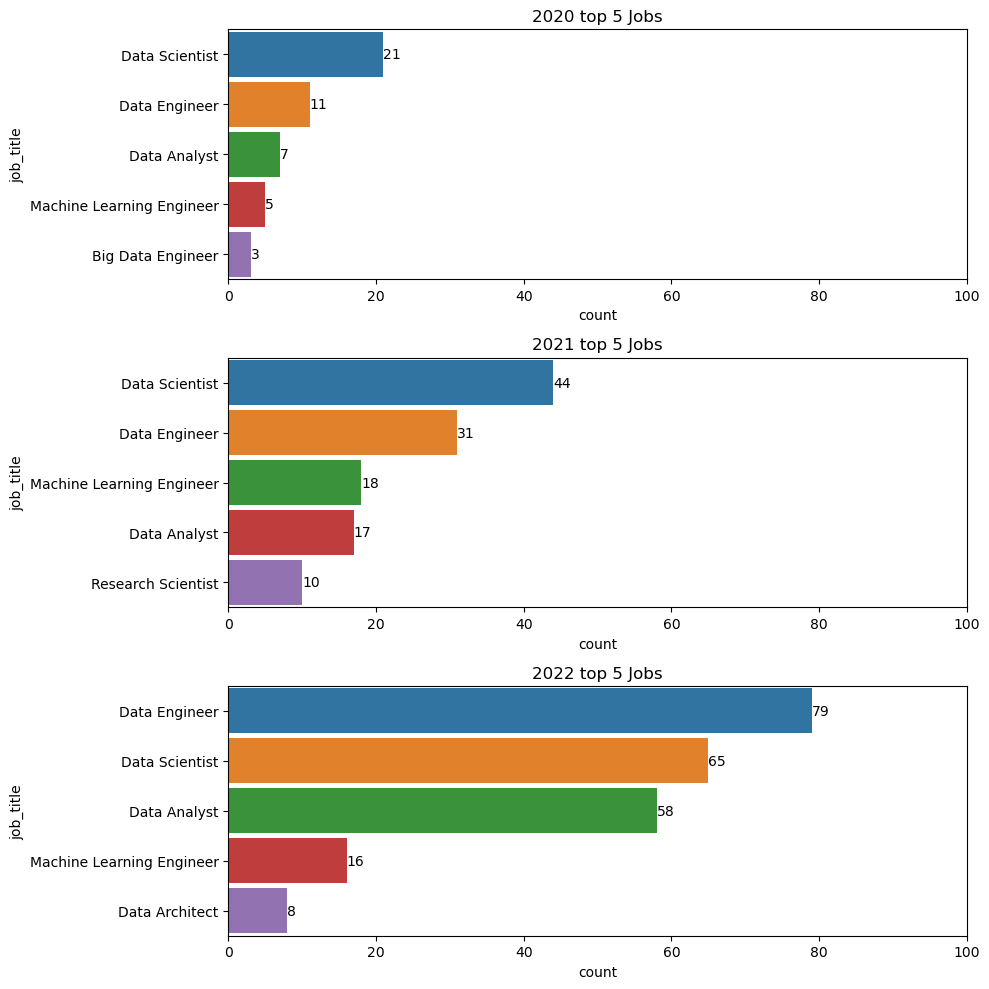

In [75]:
fig, axes = plt.subplots(3, 1, figsize=(10,10))

fig1 = sns.countplot(df1, y = 'job_title', orient='h',ax=axes[0], order=df1['job_title'].value_counts()[:5].index, width = 0.9)
fig1.set_title('2020 top 5 Jobs')
fig1.set_xticks([0,20,40,60,80,100])
for i in fig1.containers:
    fig1.bar_label(i)
    
fig2 = sns.countplot(df2, y = 'job_title', orient='h',ax=axes[1], order=df2['job_title'].value_counts()[:5].index, width = 0.9)
fig2.set_title('2021 top 5 Jobs')
fig2.set_xticks([0,20,40,60,80,100])
for i in fig2.containers:
    fig2.bar_label(i)
    
fig3 = sns.countplot(df3, y = 'job_title', orient='h',ax=axes[2], order=df3['job_title'].value_counts()[:5].index, width = 0.9)
fig3.set_title('2022 top 5 Jobs')
fig3.set_xticks([0,20,40,60,80,100])
for i in fig3.containers:
    fig3.bar_label(i)

fig.tight_layout()
plt.show()

<font size='5'>• High demand job categories are Data Engineer and Data Scientist.</font>

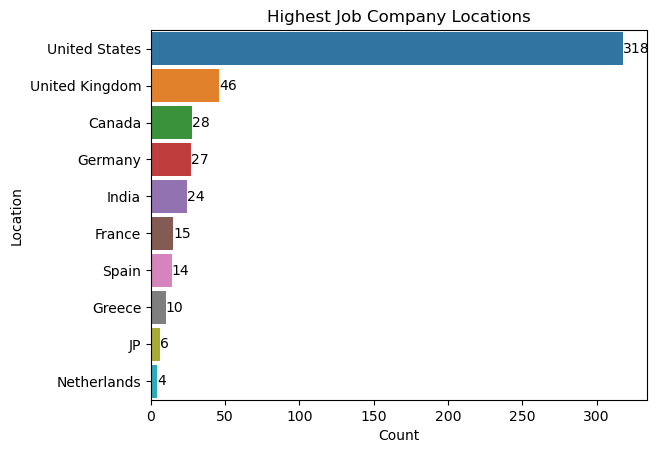

In [76]:
fig = sns.countplot(df, y = 'company_location', orient='h', order=df['company_location'].value_counts()[:10].index, width=0.9)
for i in fig.containers:
    fig.bar_label(i)

fig.set_title('Highest Job Company Locations')
fig.set_xlabel('Count')
fig.set_ylabel('Location')

plt.show()

<font size='5'>• The majority of job opportunities are based in the United States.</font>

In [77]:
df.salary_in_usd.describe()

count       565.000000
mean     110610.343363
std       72280.702792
min        2859.000000
25%       60757.000000
50%      100000.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

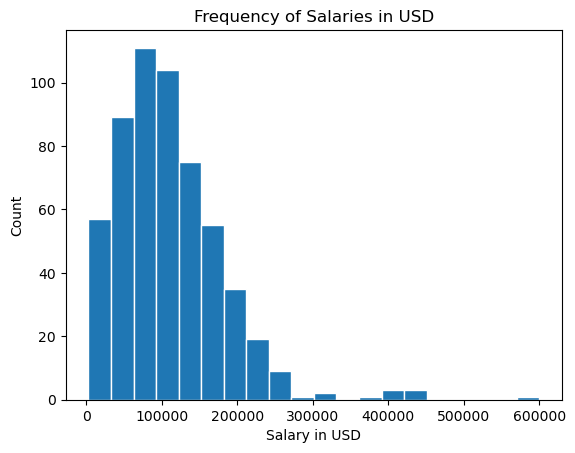

In [78]:
fig = plt.hist(data=df, x='salary_in_usd', bins = 20, ec='white')
plt.title('Frequency of Salaries in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Count')

plt.show()

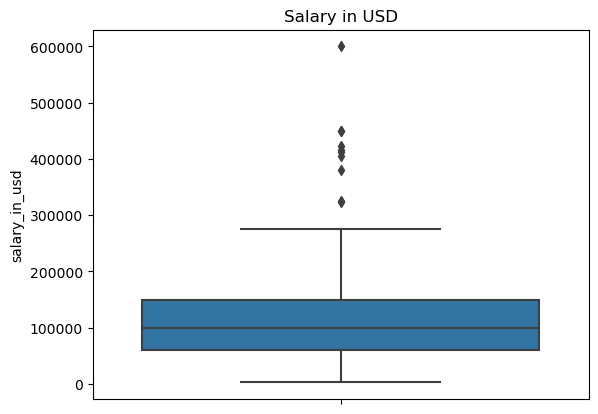

In [79]:
fig = sns.boxplot(data = df, y = 'salary_in_usd')
plt.title('Salary in USD')
plt.show()

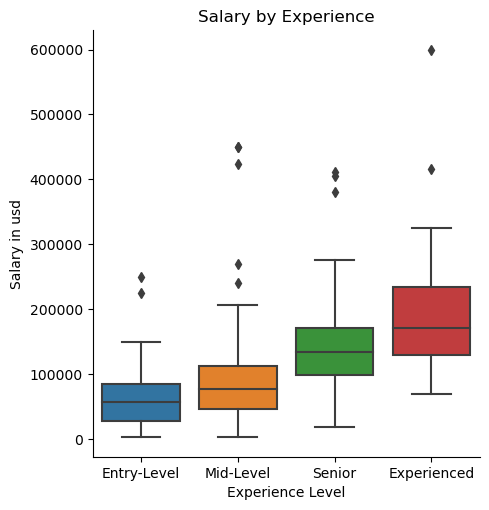

In [80]:
exp_order = ['Entry-Level', 'Mid-Level', 'Senior', 'Experienced']
sns.catplot(data=df,
            x='experience_level',
            y='salary_in_usd',
            kind='box',
            order=exp_order)
plt.title('Salary by Experience')
plt.xlabel('Experience Level')
plt.ylabel('Salary in usd')
plt.show()

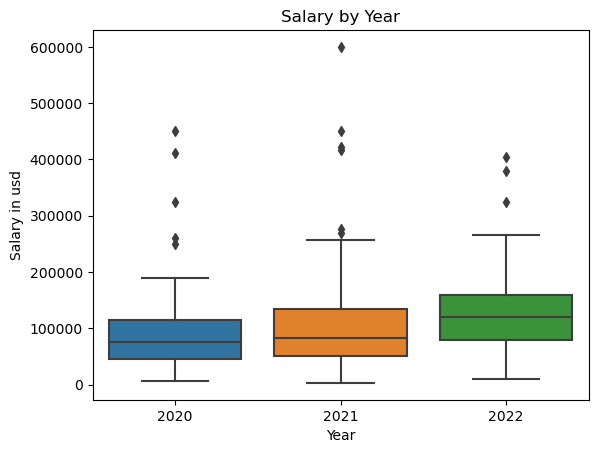

In [81]:
sns.boxplot(data=df,
            x='work_year',
            y='salary_in_usd')
plt.title('Salary by Year')
plt.xlabel('Year')
plt.ylabel('Salary in usd')
plt.show()

<font size='5'>
• From above we can see that most of salaries are between \$60k and \$150k. Furthermore Lowest salary \$2859 and highest salary \$600K.<br>
• Average salary is $110k. 
</font>

## CONCLUSIONS

<font size = '5'>• Data-related jobs have experienced rapid growth over the years.<br>
• Mid Level and Senior Level have highest job positions.<br>
• Data Analysis and Data Engineering have significant growth over the years and Data science have Highest Positions.<br>
• One might expect to see the majority of job positions coming from larger companies, but in reality, most job positions are offered by medium-sized companies.<br>
• Data analysis typically offers lower salaries compared to other fields, but the average is still around \$100k.<br>
</font>